Q.    
Prepare a classification model using Naive Bayes for salary Data.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
train = pd.read_csv("SalaryData_Train.csv")
train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [3]:
test = pd.read_csv("SalaryData_Test.csv")
test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0.0,0.0,30.0,United-States,<=50K


## EDA on Train data

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3181 entries, 0 to 3180
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            3181 non-null   int64  
 1   workclass      3181 non-null   object 
 2   education      3180 non-null   object 
 3   educationno    3180 non-null   float64
 4   maritalstatus  3180 non-null   object 
 5   occupation     3180 non-null   object 
 6   relationship   3180 non-null   object 
 7   race           3180 non-null   object 
 8   sex            3180 non-null   object 
 9   capitalgain    3180 non-null   float64
 10  capitalloss    3180 non-null   float64
 11  hoursperweek   3180 non-null   float64
 12  native         3180 non-null   object 
 13  Salary         3180 non-null   object 
dtypes: float64(4), int64(1), object(9)
memory usage: 348.1+ KB


In [5]:
train.isna().sum()

age              0
workclass        0
education        1
educationno      1
maritalstatus    1
occupation       1
relationship     1
race             1
sex              1
capitalgain      1
capitalloss      1
hoursperweek     1
native           1
Salary           1
dtype: int64

In [6]:
train.fillna(0)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3176,35,Private,Bachelors,13.0,Married-civ-spouse,Sales,Husband,White,Male,0.0,0.0,40.0,United-States,<=50K
3177,38,Private,HS-grad,9.0,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
3178,31,Private,HS-grad,9.0,Divorced,Transport-moving,Not-in-family,White,Male,0.0,0.0,55.0,United-States,<=50K
3179,17,Self-emp-inc,11th,7.0,Never-married,Prof-specialty,Own-child,White,Male,0.0,0.0,20.0,United-States,<=50K


In [7]:
train[train.duplicated()].shape

(46, 14)

In [8]:
train[train.duplicated()]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
326,33,Private,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
364,27,Private,Bachelors,13.0,Never-married,Craft-repair,Not-in-family,White,Male,0.0,0.0,50.0,United-States,<=50K
518,24,Private,HS-grad,9.0,Never-married,Handlers-cleaners,Unmarried,Black,Female,0.0,0.0,40.0,United-States,<=50K
525,24,Private,HS-grad,9.0,Never-married,Craft-repair,Own-child,White,Male,0.0,0.0,40.0,United-States,<=50K
619,33,Private,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
795,33,Private,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0.0,40.0,United-States,<=50K
869,20,Private,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0.0,40.0,United-States,<=50K
958,43,Private,Some-college,10.0,Divorced,Adm-clerical,Not-in-family,White,Female,0.0,0.0,40.0,United-States,<=50K
965,61,Private,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0.0,40.0,United-States,<=50K
993,49,Private,HS-grad,9.0,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,0.0,40.0,United-States,<=50K


In [9]:
train1 = train.drop_duplicates()
train1.iloc[325:330]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
325,26,Private,HS-grad,9.0,Married-civ-spouse,Other-service,Husband,White,Male,0.0,0.0,40.0,United-States,<=50K
327,46,Local-gov,11th,7.0,Married-civ-spouse,Transport-moving,Husband,White,Male,0.0,0.0,30.0,United-States,<=50K
328,38,Federal-gov,HS-grad,9.0,Married-civ-spouse,Adm-clerical,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
329,65,Private,11th,7.0,Widowed,Other-service,Unmarried,Other,Male,0.0,0.0,40.0,United-States,<=50K
330,40,Private,Assoc-voc,11.0,Married-civ-spouse,Tech-support,Husband,White,Male,0.0,0.0,40.0,United-States,>50K


In [10]:
train2 = train1.reset_index()
train2 = train2.drop(columns="index")
train2.iloc[325:330]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
325,26,Private,HS-grad,9.0,Married-civ-spouse,Other-service,Husband,White,Male,0.0,0.0,40.0,United-States,<=50K
326,46,Local-gov,11th,7.0,Married-civ-spouse,Transport-moving,Husband,White,Male,0.0,0.0,30.0,United-States,<=50K
327,38,Federal-gov,HS-grad,9.0,Married-civ-spouse,Adm-clerical,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
328,65,Private,11th,7.0,Widowed,Other-service,Unmarried,Other,Male,0.0,0.0,40.0,United-States,<=50K
329,40,Private,Assoc-voc,11.0,Married-civ-spouse,Tech-support,Husband,White,Male,0.0,0.0,40.0,United-States,>50K


# Data Visualizations

C:\Users\LENOVO SSD\AppData\Local\Temp\ipykernel_7608\1658614161.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['age'],color ='red')


<Axes: xlabel='age', ylabel='Density'>

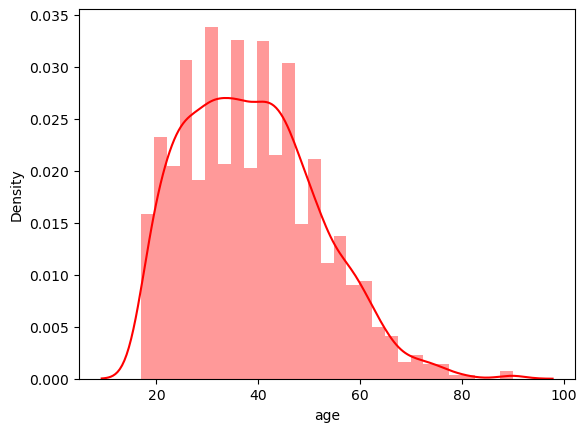

In [51]:
sns.distplot(train['age'],color ='red')

C:\Users\LENOVO SSD\AppData\Local\Temp\ipykernel_7608\2533714208.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['hoursperweek'],color ='red')


<Axes: xlabel='hoursperweek', ylabel='Density'>

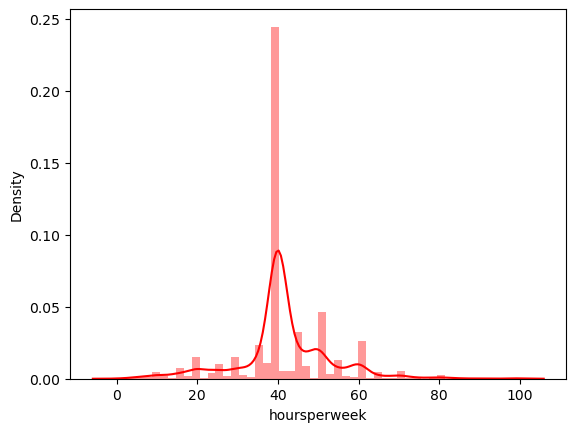

In [53]:
sns.distplot(train['hoursperweek'],color ='red')

<Axes: xlabel='occupation', ylabel='hoursperweek'>

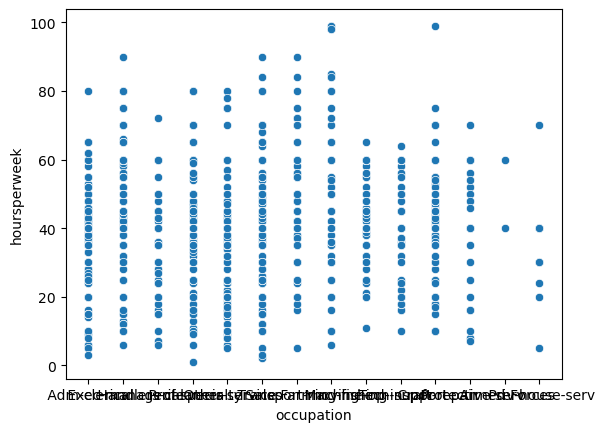

In [29]:
sns.scatterplot( x = 'occupation',y = 'hoursperweek', data = train)

<Axes: xlabel='education', ylabel='hoursperweek'>

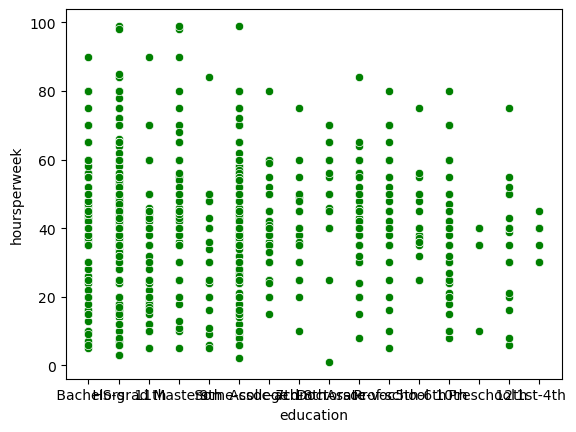

In [54]:
sns.scatterplot( x = 'education',y = 'hoursperweek', data = train,color='green')

<Axes: xlabel='age', ylabel='Salary'>

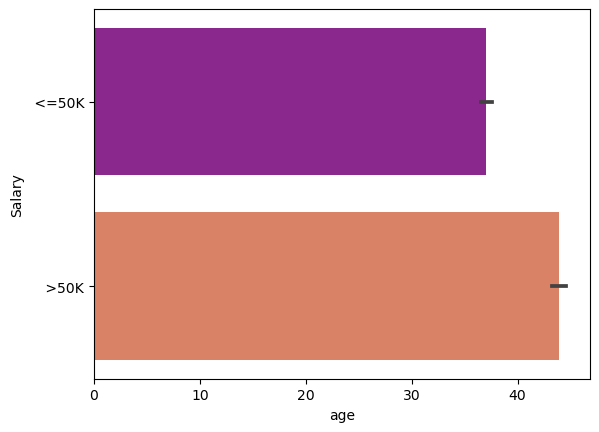

In [61]:
sns.barplot(x='age', y='Salary', data = train2, palette ='plasma')

<Axes: xlabel='age', ylabel='occupation'>

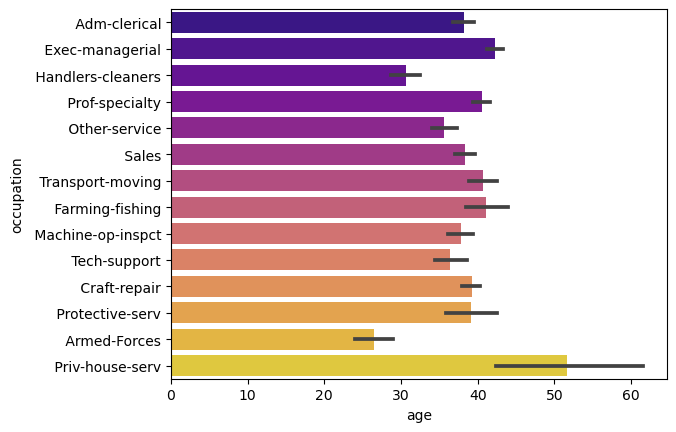

In [62]:
sns.barplot(y ='occupation', x ='age', data = train2, palette ='plasma')

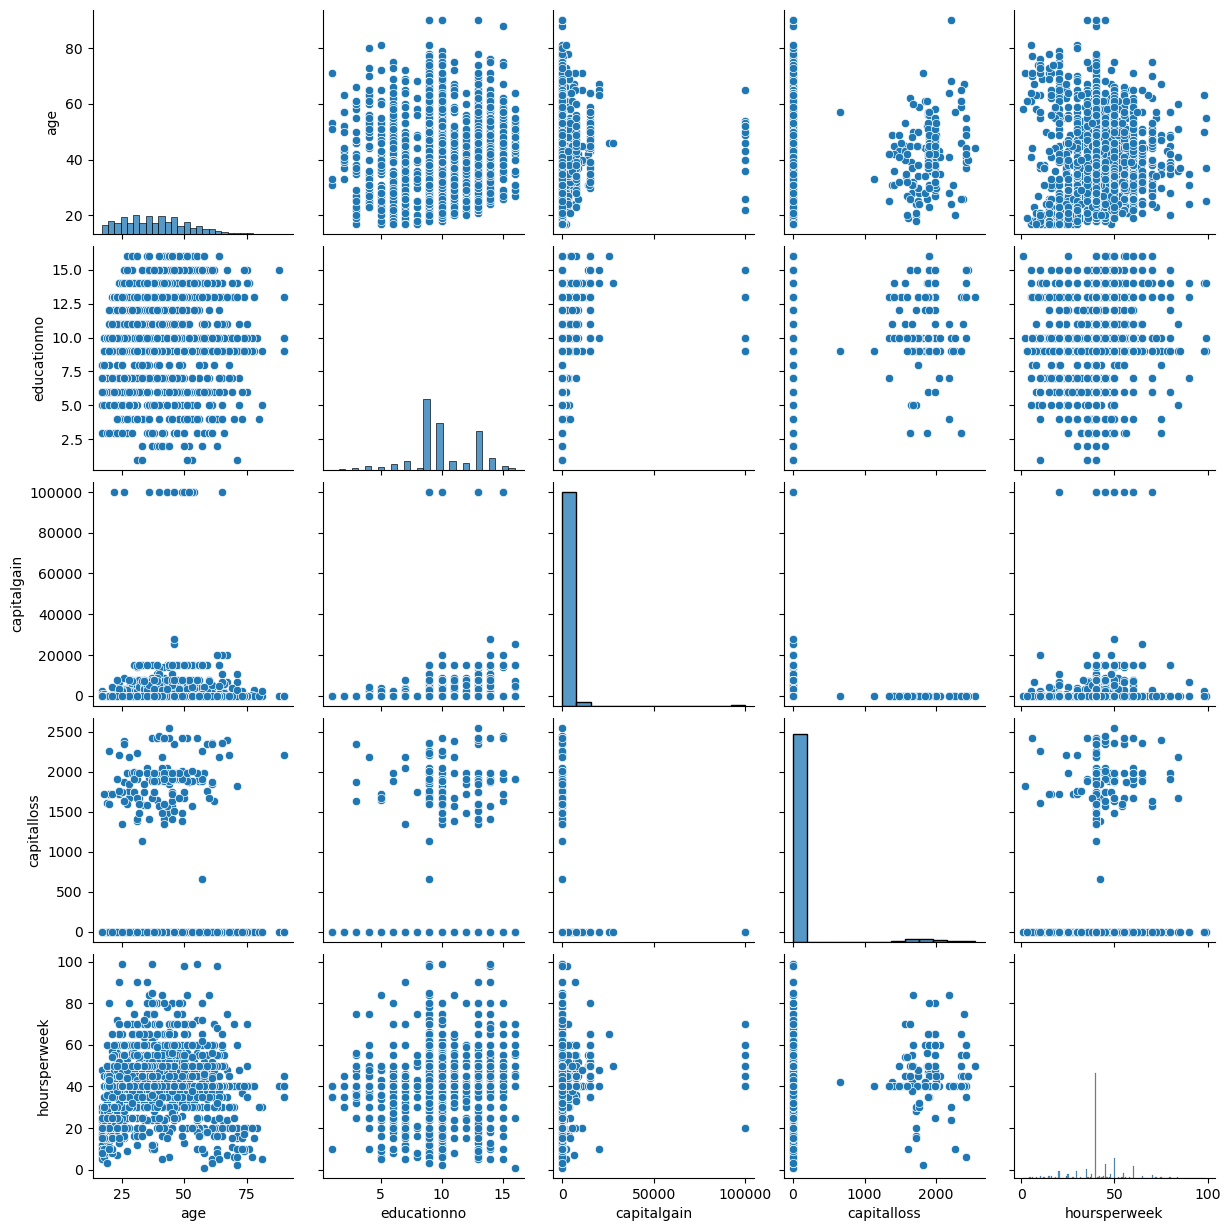

In [73]:
sns.pairplot(train)

In [70]:
corr = train2.corr()

<Axes: >

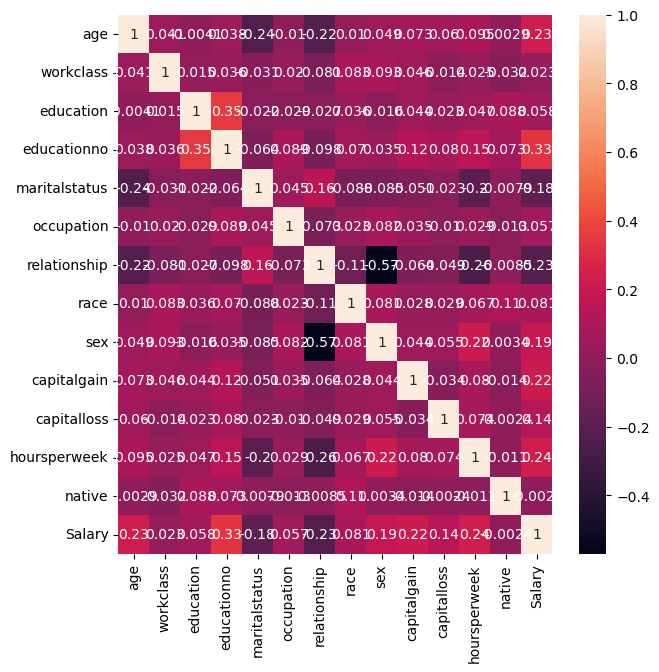

In [71]:
plt.figure(figsize=(7,7))
sns.heatmap(corr,annot=True)

<Axes: xlabel='occupation', ylabel='hoursperweek'>

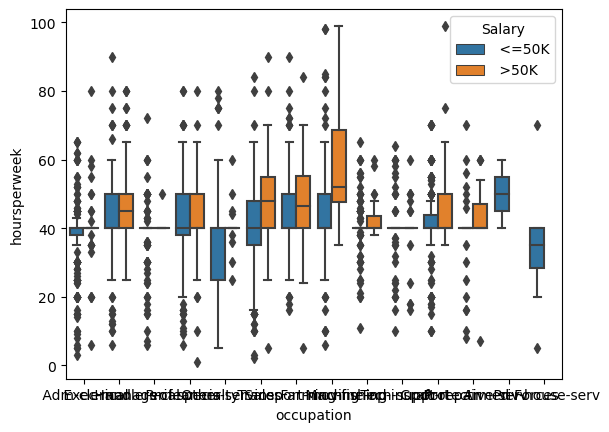

In [69]:
sns.boxplot(y ='hoursperweek', x ='occupation', data = train, hue ='Salary')

<Axes: xlabel='educationno', ylabel='race'>

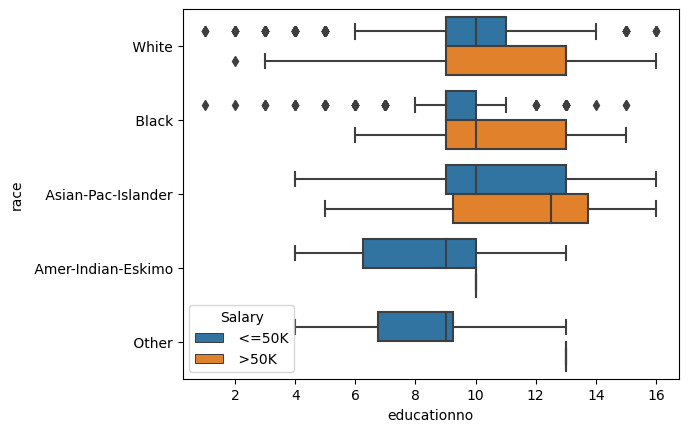

In [72]:
sns.boxplot(y ='race', x ='educationno', data = train, hue ='Salary')

In [34]:
labelencoder = LabelEncoder()
names = train2[["workclass", "education", "maritalstatus", "occupation", "relationship", "race", "sex", "native", "Salary"]]

In [35]:
for i in names:
    train2[i] = labelencoder.fit_transform(train2[i])
    
train2.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,6,9,13.0,4,0,1,4,1,2174.0,0.0,40.0,36,0
1,50,5,9,13.0,2,3,0,4,1,0.0,0.0,13.0,36,0
2,38,3,11,9.0,0,5,1,4,1,0.0,0.0,40.0,36,0
3,53,3,1,7.0,2,5,0,2,1,0.0,0.0,40.0,36,0
4,28,3,9,13.0,2,9,5,2,0,0.0,0.0,40.0,4,0


## EDA on Test data

In [36]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8413 entries, 0 to 8412
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            8413 non-null   int64  
 1   workclass      8413 non-null   object 
 2   education      8413 non-null   object 
 3   educationno    8413 non-null   int64  
 4   maritalstatus  8413 non-null   object 
 5   occupation     8412 non-null   object 
 6   relationship   8412 non-null   object 
 7   race           8412 non-null   object 
 8   sex            8412 non-null   object 
 9   capitalgain    8412 non-null   float64
 10  capitalloss    8412 non-null   float64
 11  hoursperweek   8412 non-null   float64
 12  native         8412 non-null   object 
 13  Salary         8412 non-null   object 
dtypes: float64(3), int64(2), object(9)
memory usage: 920.3+ KB


In [37]:
test.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       1
relationship     1
race             1
sex              1
capitalgain      1
capitalloss      1
hoursperweek     1
native           1
Salary           1
dtype: int64

In [38]:
test.fillna(0)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0.0,0.0,30.0,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8408,37,Local-gov,Assoc-voc,11,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,45.0,United-States,<=50K
8409,20,Private,Some-college,10,Never-married,Sales,Unmarried,White,Female,0.0,0.0,35.0,United-States,<=50K
8410,45,Private,Assoc-voc,11,Never-married,Sales,Not-in-family,White,Female,14344.0,0.0,48.0,United-States,>50K
8411,34,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,45.0,United-States,>50K


In [39]:
test[test.duplicated()].shape

(322, 14)

In [40]:
test[test.duplicated()]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
551,59,Private,HS-grad,9,Divorced,Other-service,Not-in-family,White,Female,0.0,0.0,40.0,United-States,<=50K
601,32,Private,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0.0,0.0,40.0,United-States,<=50K
681,40,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,0.0,40.0,United-States,<=50K
799,24,Private,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0.0,0.0,35.0,United-States,<=50K
1044,44,Private,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999.0,0.0,60.0,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8334,41,Private,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
8341,17,Private,10th,6,Never-married,Sales,Own-child,White,Female,0.0,0.0,20.0,United-States,<=50K
8379,20,Private,HS-grad,9,Never-married,Machine-op-inspct,Own-child,White,Female,0.0,0.0,40.0,United-States,<=50K
8381,18,Private,HS-grad,9,Never-married,Other-service,Not-in-family,White,Female,0.0,0.0,30.0,United-States,<=50K


In [41]:
test1 = test.drop_duplicates()
test1.iloc[550:555]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
550,49,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,50.0,United-States,>50K
552,38,Private,HS-grad,9,Separated,Machine-op-inspct,Unmarried,Black,Female,0.0,0.0,28.0,United-States,<=50K
553,50,Self-emp-inc,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0.0,0.0,55.0,United-States,<=50K
554,51,Self-emp-inc,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,1672.0,55.0,United-States,<=50K
555,22,Private,Some-college,10,Never-married,Machine-op-inspct,Own-child,Asian-Pac-Islander,Male,0.0,0.0,35.0,United-States,<=50K


In [42]:
test2 = test1.reset_index()
test2 = test2.drop(columns="index")
test2.iloc[550:555]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
550,49,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,50.0,United-States,>50K
551,38,Private,HS-grad,9,Separated,Machine-op-inspct,Unmarried,Black,Female,0.0,0.0,28.0,United-States,<=50K
552,50,Self-emp-inc,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0.0,0.0,55.0,United-States,<=50K
553,51,Self-emp-inc,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,1672.0,55.0,United-States,<=50K
554,22,Private,Some-college,10,Never-married,Machine-op-inspct,Own-child,Asian-Pac-Islander,Male,0.0,0.0,35.0,United-States,<=50K


In [43]:
labelencoder = LabelEncoder()
names = test2[["workclass", "education", "maritalstatus", "occupation", "relationship", "race", "sex", "native", "Salary"]]

In [44]:
for i in names:
    test2[i] = labelencoder.fit_transform(test2[i])
    
test2.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,5,6,3,2,1,0.0,0.0,40.0,37,0
1,38,2,11,9,3,4,0,4,1,0.0,0.0,50.0,37,0
2,28,1,7,12,3,10,0,4,1,0.0,0.0,40.0,37,1
3,44,2,15,10,3,6,0,2,1,7688.0,0.0,40.0,37,1
4,34,2,0,6,5,7,1,4,1,0.0,0.0,30.0,37,0


## Train & Test Split

In [45]:
x_train = train2.iloc[:, 0:13]
y_train = train2.iloc[:, 13]
x_test = test2.iloc[:, 0:13]
y_test = test2.iloc[:, 13]

## Normalization

In [46]:
def norm_func (i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [47]:
x_train = norm_func(x_train)
x_test =  norm_func(x_test)

In [57]:
x_train.fillna(0,inplace=True)

In [56]:
x_test.fillna(0,inplace=True)

## Building model using Gaussian Naive Bayes

In [58]:
gb = GaussianNB()
gb.fit(x_train, y_train)

GaussianNB()

In [59]:
pred_gb = gb.predict(x_test)
pred_gb

array([0, 0, 0, ..., 1, 0, 0])

In [60]:
confusion_matrix(y_test, pred_gb)

array([[5851,  246,    0],
       [1378,  615,    0],
       [   1,    0,    0]], dtype=int64)

In [61]:
accuracy = accuracy_score(y_test, pred_gb)
print((accuracy)*100)

79.91595600049438


In [62]:
print("The accuracy of the Gaussian Naive Bayes classifier on training data is {:.2f} out of 1".format(gb.score(x_train, y_train)*100))

print("The accuracy of the Gaussian Naive Bayes classifier on test data is {:.2f} out of 1".format(gb.score(x_test, y_test)*100))

The accuracy of the Gaussian Naive Bayes classifier on training data is 78.88 out of 1
The accuracy of the Gaussian Naive Bayes classifier on test data is 79.92 out of 1


## Building model using Multinomial Naive Bayes

In [63]:
mb = MultinomialNB()
mb.fit(x_train, y_train)

MultinomialNB()

In [64]:
pred_mb = mb.predict(x_test)
pred_mb

array([0, 0, 0, ..., 0, 0, 0])

In [65]:
confusion_matrix(y_test, pred_mb)

array([[6095,    2,    0],
       [1944,   49,    0],
       [   1,    0,    0]], dtype=int64)

In [66]:
accuracy = accuracy_score(y_test, pred_mb)
print((accuracy)*100)

75.93622543566926


In [72]:
print("The accuracy of the Multinomial Naive Bayes classifier on training data is {:.2f} out of 1".format(mb.score(x_train, y_train)*100))

print("The accuracy of the Multinomial Naive Bayes classifier on test data is {:.2f} out of 1".format(mb.score(x_test, y_test)*100))

The accuracy of the Multinomial Naive Bayes classifier on training data is 74.93 out of 1
The accuracy of the Multinomial Naive Bayes classifier on test data is 75.94 out of 1


Conclusion-
GaussianNB Model has a better Accuracy. Hence we will use GaussianNB Classifier on Salary data.